In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Visualize

In [67]:
import os
os.chdir('/home/stud/ath/ath_ws/keypoint_dataset_pipeline')
from config import config
import cv2
import numpy as np

In [68]:
from src import Painter
painter = Painter()

In [88]:
names = painter.data_store.get_random_pair()
name_a, name_b = names.split('_')

# name_a, name_b = '8932905931390', '8932988661990'
name_a, name_b

('8934752998090', '8934952739890')

In [70]:
# name_a = config.samples[config.task.name].reference
# name_b = config.samples[config.task.name].target
# 
# name_a, name_b

# Keypoints

In [71]:
# painter.show_keypoints(name_a, filtered=False)

In [72]:
# painter.show_keypoints(name_a, filtered=True)

# Matches

In [73]:
# painter.show_matches(name_a, name_b) 

# Filtered Matches

INFO     | show_filtered_matches | Number of Matches 76


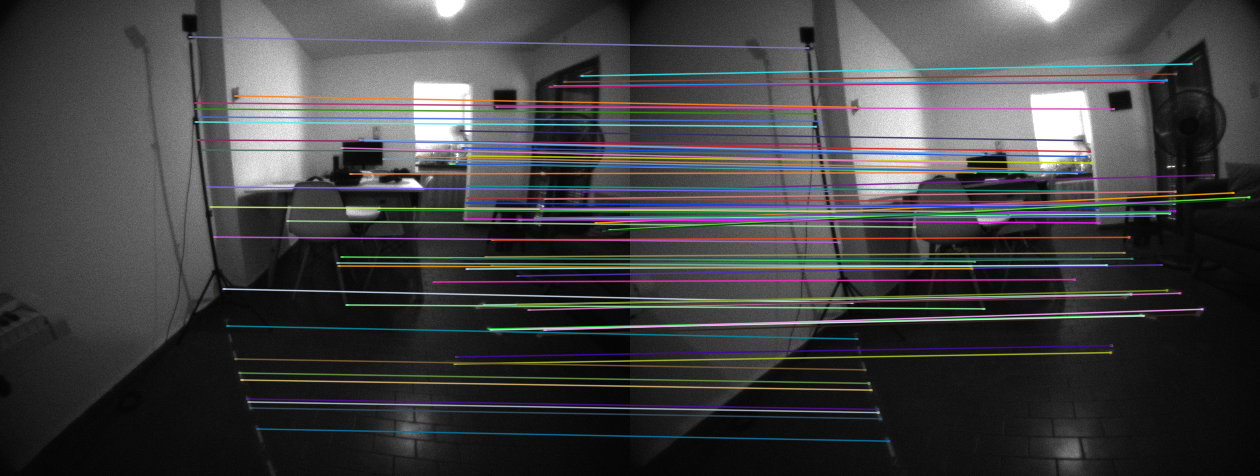

In [89]:
painter.show_filtered_matches(name_a, name_b)

# Rotations

In [90]:
from src import rotate

In [102]:
index = 28

INFO     | show_one_match | Number of Matches 76


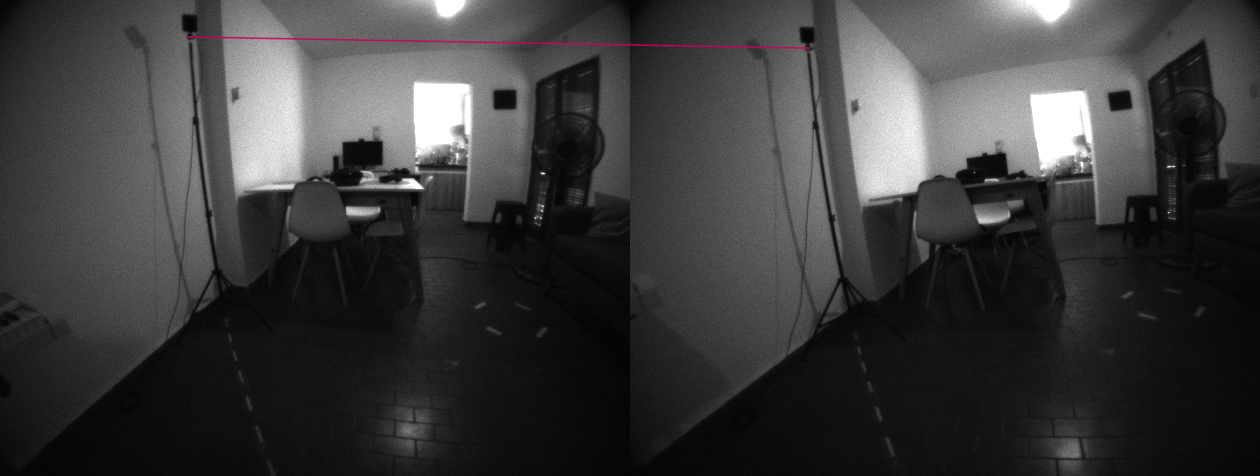

In [103]:
image_vis, image_a, image_b, image_a_coord, image_b_coord = painter.show_one_match(name_a, name_b, index=index)
image_vis

In [104]:
# im = cv2.drawKeypoints(np.array(image_a), [image_a_coord], None)
# painter._to_image(im)

In [105]:
# im = cv2.drawKeypoints(np.array(image_b), [image_b_coord], None)
# painter._to_image(im)

In [106]:
def crop_patch(image, x, y, size=32):
    # Calculate the box (left, upper, right, lower) for cropping
    left = max(x - size / 2, 0)
    upper = max(y - size / 2, 0)
    right = min(x + size / 2, image.width)
    lower = min(y + size / 2, image.height)
    
    # Crop and return the patch
    patch = image.crop((left, upper, right, lower))
    
    local_x = x - left
    local_y = y - upper
    
    return patch, local_x, local_y

In [107]:
bw_image_a, a_x, a_y = crop_patch(image_a, image_a_coord.pt[0], image_a_coord.pt[1])
bw_image_a = bw_image_a.convert("L")
# bw_image_a = np.array(bw_image_a)

bw_image_b, b_x, b_y = crop_patch(image_b, image_b_coord.pt[0], image_b_coord.pt[1])
bw_image_b = bw_image_b.convert("L")
# bw_image_b = np.array(bw_image_b)

# bw_image_a.shape, bw_image_b.shape

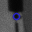

In [108]:
painter._to_image(
    cv2.drawKeypoints(
        np.array(bw_image_a), 
        [cv2.KeyPoint(a_x, a_y, 1.)], 
        None
    )
)

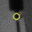

In [109]:
painter._to_image(
    cv2.drawKeypoints(
        np.array(bw_image_b), 
        [cv2.KeyPoint(b_x, b_y, 1.)], 
        None
    )
)

In [110]:
print(image_a_coord.pt, image_b_coord.pt)
print([a_x, a_y], [b_x, b_y])

angle = rotate.solve_patch_rotation(
    bw_image_a, 
    bw_image_b, 
    [a_x, a_y],
    [b_x, b_y],
    # image_a_coord.pt, 
    # image_b_coord.pt,
)

print(angle)
print(angle * (180 / np.pi))

(189.5, 36.49999237060547) (177.42529296875, 47.64533615112305)
[16.0, 16.0] [16.0, 16.0]
1.776443756765259
101.78272980501391


In [111]:
old_angles = painter.data_store.rotations[names][()]
print(old_angles.shape)
print(old_angles[index])
print(old_angles[index] * (180 / np.pi))

(76,)
0.06125668126776729
3.5097493036211547


In [112]:
# painter.data_store.close()